In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
df_test=pd.read_csv('https://raw.githubusercontent.com/zhaoz127/haha/refs/heads/main/test.csv' , sep=";")
df_train=pd.read_csv('https://raw.githubusercontent.com/zhaoz127/haha/refs/heads/main/train.csv' , sep=";")


In [77]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [79]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [81]:
df_train['source'] = 'train'
df_test['source'] = 'test'

In [82]:
# combine the train and test data
df_combined = pd.concat([df_train, df_test], ignore_index=True)

df_combined.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,source
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,train
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,train
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,train
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,train
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,train


In [83]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
 17  source     49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.8+ MB


## EDA 

### Quantity exploration

In [84]:
df_combined.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


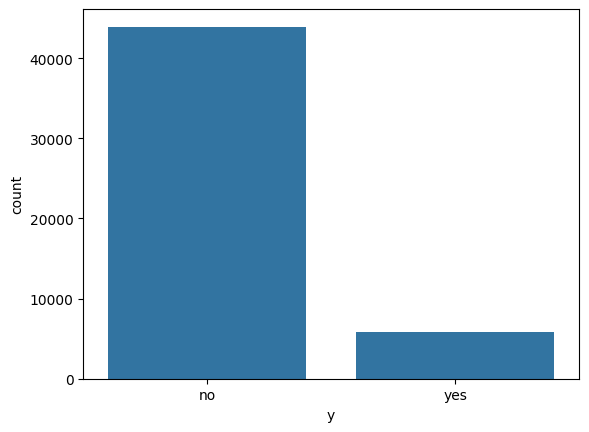

In [85]:

sns.countplot(df_combined , x = "y")
plt.xticks
plt.show()

# Display whether the customer has subscribed to a deposit
# which is highly imbalanced

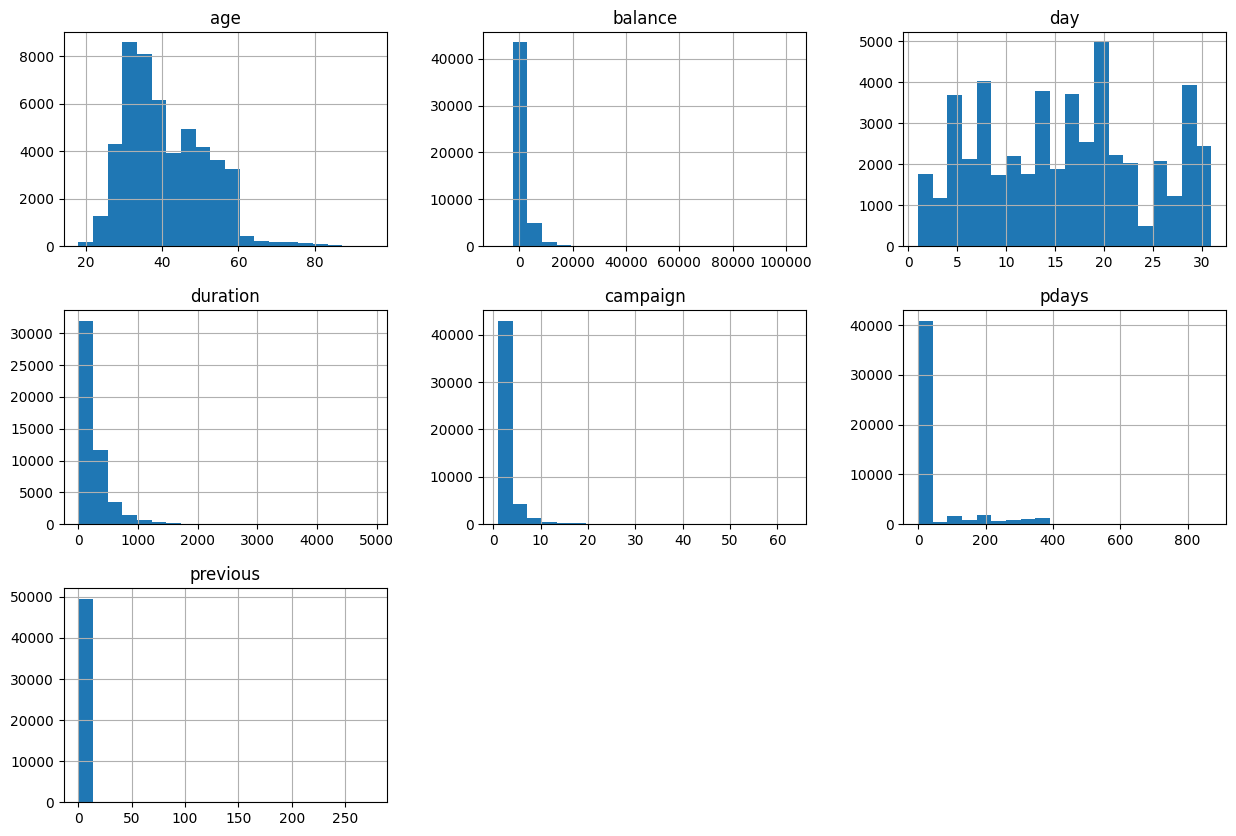

In [86]:
df_combined.hist(bins=20, figsize=(15, 10))
plt.show()

In [87]:
df_combined['job'].value_counts()

job
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: count, dtype: int64

### Relationship with y

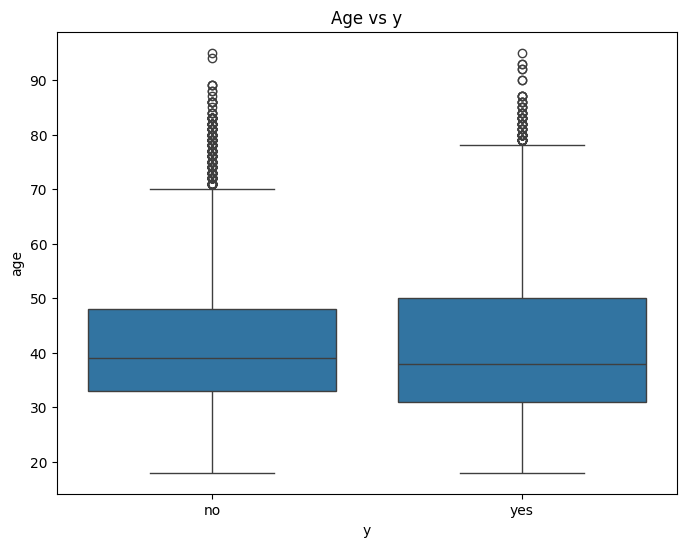

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df_combined)
plt.title('Age vs y')
plt.show()

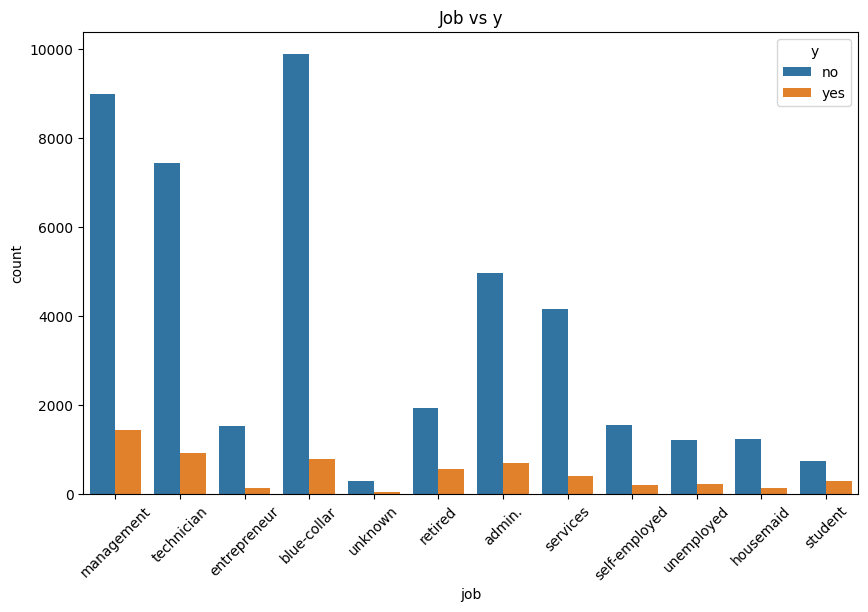

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df_combined)
plt.title('Job vs y')
plt.xticks(rotation=45)
plt.show()

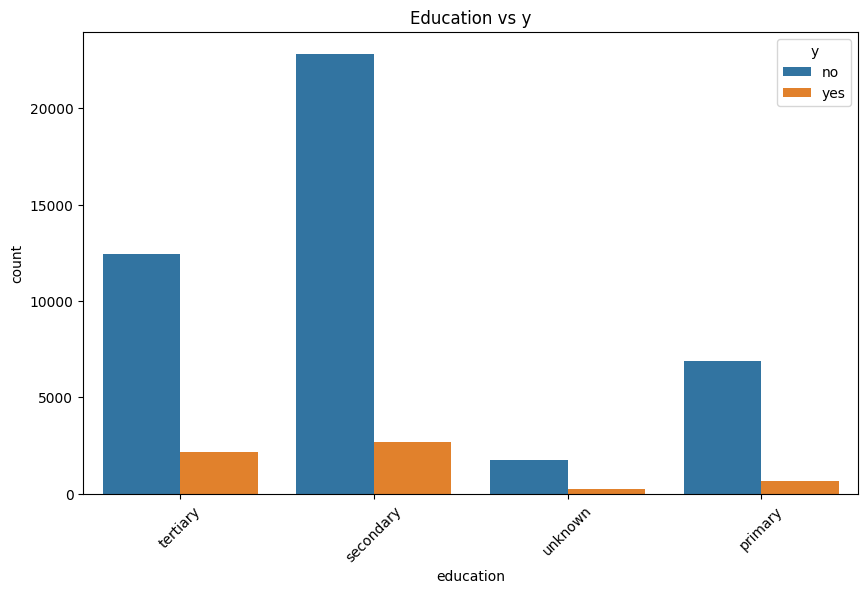

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df_combined)
plt.title('Education vs y')
plt.xticks(rotation=45)
plt.show()

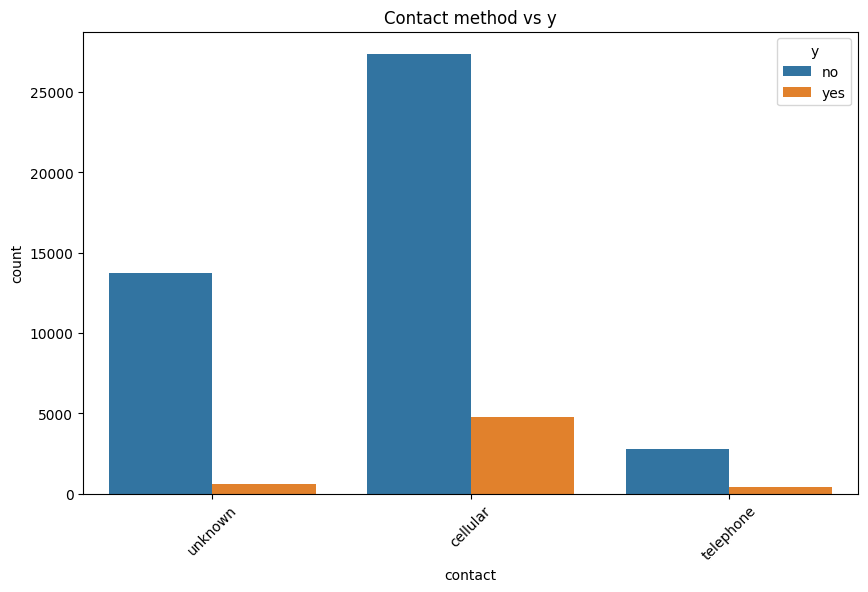

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=df_combined)
plt.title('Contact method vs y')
plt.xticks(rotation=45)
plt.show()

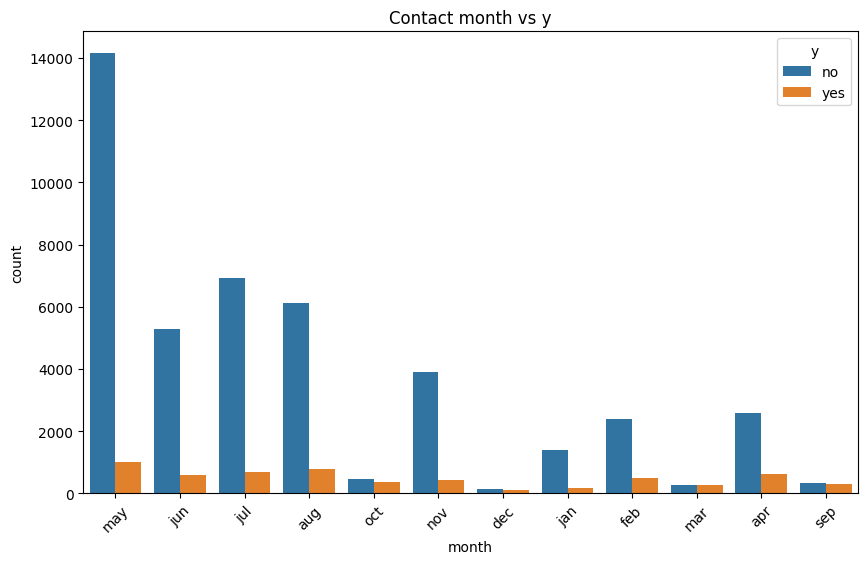

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=df_combined)
plt.title('Contact month vs y')
plt.xticks(rotation=45)
plt.show()

## Data Clean


In [93]:
df_combined.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
source       0
dtype: int64

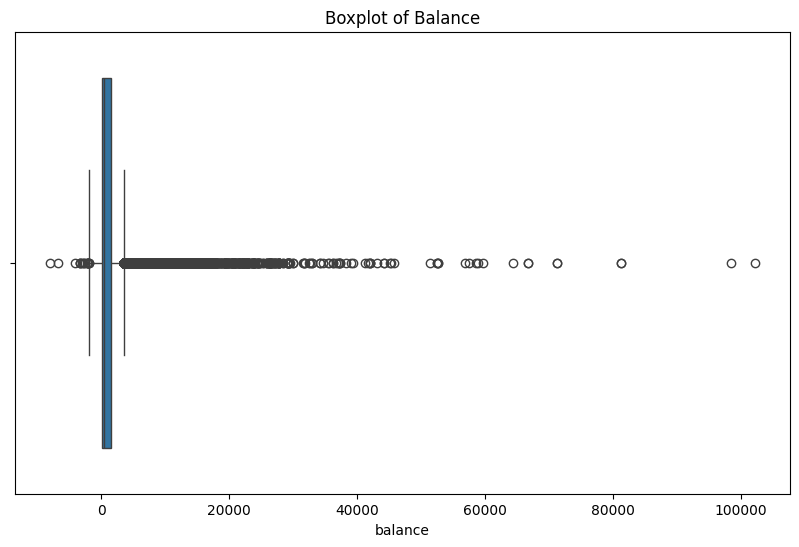

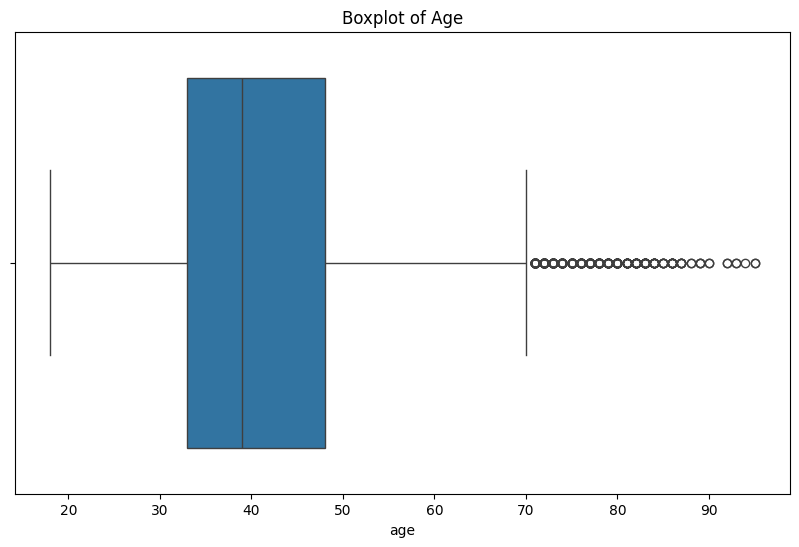

In [94]:
# check for outliers for age and balance
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['balance'])
plt.title('Boxplot of Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['age'])
plt.title('Boxplot of Age')
plt.show()

In [95]:
# Calculate the 99th percentile
upper_bound = df_combined['balance'].quantile(0.99)

# Cap the values above the 99th percentile to the 99th percentile value
df_combined['balance'] = df_combined['balance'].clip(upper=upper_bound)

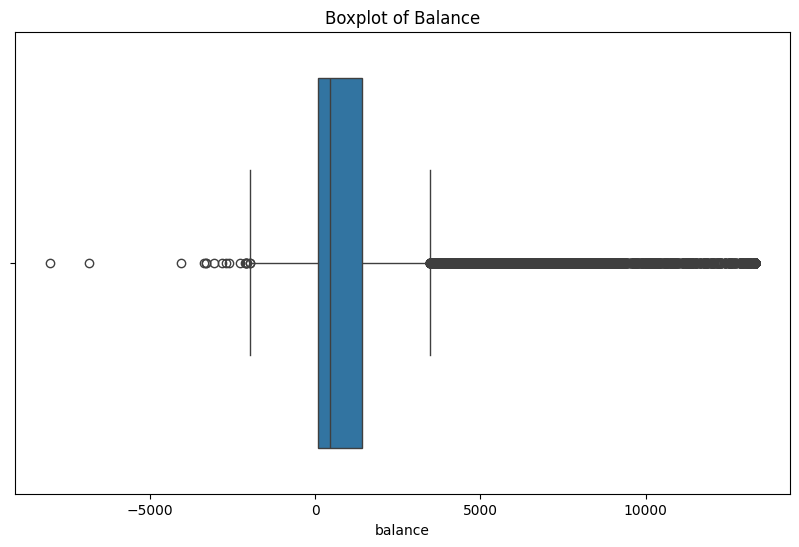

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['balance'])
plt.title('Boxplot of Balance')
plt.show()

In [97]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_combined['age'].quantile(0.25)
Q3 = df_combined['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the 'balance' values to these bounds
df_combined['age'] = df_combined['age'].clip(lower=lower_bound, upper=upper_bound)


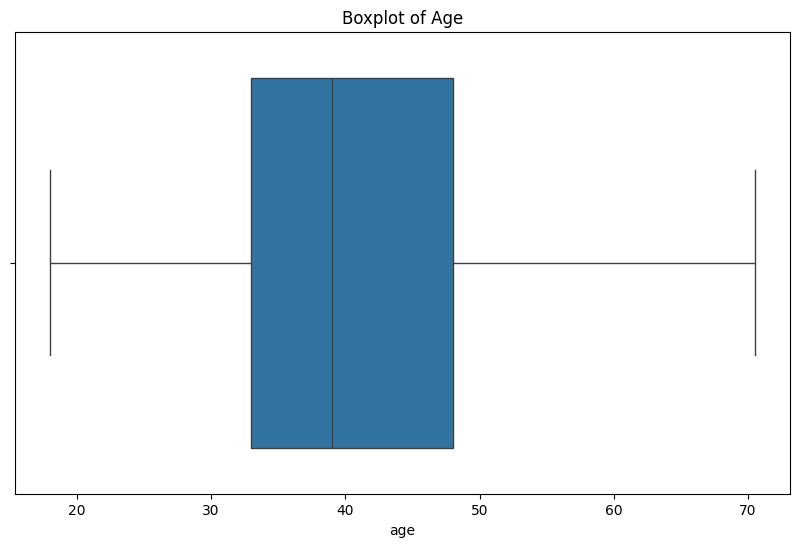

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['age'])
plt.title('Boxplot of Age')
plt.show()

In [99]:
cat_feature=[feature for feature in df_combined.columns if df_combined[feature].dtypes=='object']
cat_feature
for feature in cat_feature:
    print(feature, len(df_combined[feature].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2
source 2


In [100]:
df_combined['y'] = df_combined['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [101]:
df_combined['marital'] = df_combined['marital'].apply(lambda x: 1 if x == 'married' else 0)
df_combined['education'] = df_combined['education'].apply(lambda x: 1 if x == 'secondary' else 0)
df_combined['default'] = df_combined['default'].apply(lambda x: 1 if x == 'yes' else 0)
df_combined['housing'] = df_combined['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df_combined['loan'] = df_combined['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df_combined['contact'] = df_combined['contact'].apply(lambda x: 1 if x == 'cellular' else 0)
df_combined['month'] = df_combined['month'].apply(lambda x: 1 if x == 'may' else 0)
df_combined['poutcome'] = df_combined['poutcome'].apply(lambda x: 1 if x == 'successful' else 0)


In [102]:
print(df_combined)

        age            job  marital  education  default  balance  housing  \
0      58.0     management        1          0        0   2143.0        1   
1      44.0     technician        0          1        0     29.0        1   
2      33.0   entrepreneur        1          1        0      2.0        1   
3      47.0    blue-collar        1          0        0   1506.0        1   
4      33.0        unknown        0          0        0      1.0        0   
...     ...            ...      ...        ...      ...      ...      ...   
49727  33.0       services        1          1        0   -333.0        1   
49728  57.0  self-employed        1          0        1  -3313.0        1   
49729  57.0     technician        1          1        0    295.0        0   
49730  28.0    blue-collar        1          1        0   1137.0        0   
49731  44.0   entrepreneur        0          0        0   1136.0        1   

       loan  contact  day  month  duration  campaign  pdays  previous  \
0 

In [123]:
# Split the data into train and test based on the values in 'split_column'
train_data = df_combined[df_combined['source'] == 'train']
test_data = df_combined[df_combined['source'] == 'test']

# Separate features and target
X_train = train_data.drop(['y', 'source', 'job', 'day', 'pdays'], axis=1)
y_train = train_data['y']

X_test = test_data.drop(['y', 'source', 'job', 'day', 'pdays'], axis=1)
y_test = test_data['y']

In [124]:
from sklearn.preprocessing import StandardScaler

# Create a scaling pipeline
scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())])

# Fit the pipeline on the training data
scaling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler())])

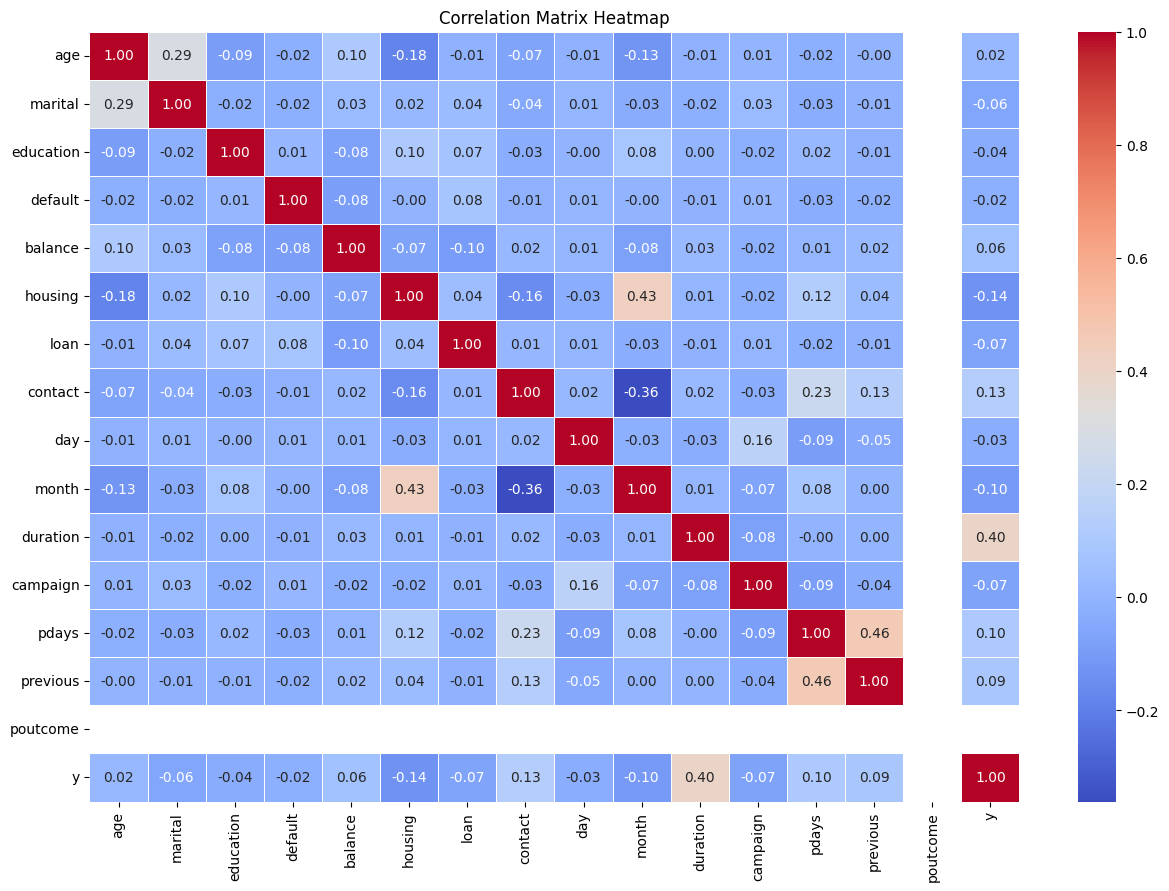

In [125]:
# remove the target column from the combined dataset
df_numeric = df_combined.select_dtypes(include=[np.number])

# heatmap to show the correlation between the features
corr_matrix = df_numeric.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Data balance


In [126]:
df_combined_encoded['y'].value_counts()

y
no     43922
yes     5810
Name: count, dtype: int64

## Build Baseline Models

In [127]:
print(df_combined.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'source'],
      dtype='object')


In [131]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)

knn_scores = cross_val_score(knn, X_train, y_train, scoring= 'f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)

print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')

Logistic Regression Mean F1 Score: 0.25975562554964926
K-Nearest Neighbors Mean F1 Score: 0.2510053633195349


### Logistic Regression

In [128]:
# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.88940499889405
Confusion Matrix:
[[3913   87]
 [ 413  108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.55      0.21      0.30       521

    accuracy                           0.89      4521
   macro avg       0.73      0.59      0.62      4521
weighted avg       0.86      0.89      0.87      4521



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN Classifer

In [132]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9013492590134926
Confusion Matrix:
[[3903   97]
 [ 349  172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.55      0.21      0.30       521

    accuracy                           0.89      4521
   macro avg       0.73      0.59      0.62      4521
weighted avg       0.86      0.89      0.87      4521



## Ensemble Modelling